In [1]:
#Подключение небходимых библиотек
import qiskit, qiskit_aer
import qiskit.visualization
import random

In [2]:
qubits_num = 3 #количество необходимых кубитов
secret_length = 256 #длина секрета
secret = []
for i in range(secret_length): #генерация случайного секрета
    bit = random.randint(0,1)
    secret.append(bit)

In [3]:
#функция генерации ghz состояния
def generate_ghz():
    qc = qiskit.QuantumCircuit(qubits_num, qubits_num) #указываем количество 
    #кубитов и классических регистров
    
    qc.h(0) #применяем гейт Адамара
    qc.cx(0,1) # и гейты CNOT
    qc.cx(0,2)
    return qc

In [4]:
#функция кодирования секрета
def secret_encode(secret):
    schemes = [] #массив ghz состояний, содержащих весь секрет
    for bit in secret:
        qc = generate_ghz() #генерируем ghz состояние
        if bit == 1: #если кодируем бит "1", то применяем гейт Паули Z, 
            #иначе ничего не делаем
            
            qc.z(0)
        schemes.append(qc)
    return schemes

In [5]:
#производим кодирование секрета
encoded_secret = secret_encode(secret)

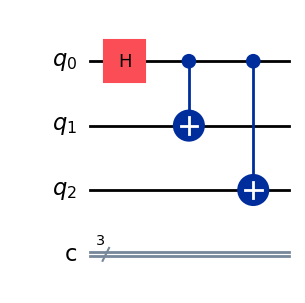

In [6]:
encoded_secret[0].draw(output='mpl')

In [7]:
#функция восстановления секрета
def secret_decode(schemes):
    recovered_secret = [] #восстановленный секрет
    bases=[] #выбранные базисы
    counts = ""
    for scheme in schemes:
        bases = []
        y_bases = 1
        while y_bases % 2 != 0: #случайно выбираем базисы до тех пор пока Y 
            #базисов не будет четно
            bases = []
            for i in range(3):
                rand = random.randint(0,1)
                if rand == 0:
                    bases.append('x')
                else:
                    bases.append('y')
            y_bases = bases.count('y')

        #проведение измерений
        for i in range(3):
            if bases[i] == 'x':
                scheme.h(i) #применяется гейт Адамара
            else:
                scheme.sdg(i) #применяется гейт sdg, затем гейт Адамара
                scheme.h(i)
            scheme.measure(i,i) #измерение i-ого кубита и запись результата в 
            #i-й классический регистр
        
        backend = qiskit_aer.AerSimulator() #подключение симулятора
        circuit = qiskit.transpile(scheme, backend) #транспиляция схемы
        job = backend.run(circuit, shots=1) #запускаем схему по одному разу для 
        #каждого бита
        result = job.result() #считываем результаты измерений
        counts=result.get_counts()
        measures = list(map(int, list(counts.keys())[0])) #преобразуем полученные 
        #результаты в массив битов
        #восстановление бита секрета по известной информации
        if bases[1] == 'x' and bases[2] == 'x':
            if (measures[1] == 0 and measures[2] == 0) or (measures[1] == 1 and
                                                           measures[2] == 1):
                if measures[0] == 0:
                    recovered_secret.append(0)
                else:
                    recovered_secret.append(1)
            elif (measures[1] == 0 and measures[2] == 1) or (measures[1] == 1 and 
                                                             measures[2] == 0):
                if measures[0] == 1:
                    recovered_secret.append(0)
                else:
                    recovered_secret.append(1)
                
        elif bases[1] == 'y' and bases[2] == 'y':
            if (measures[1] == 0 and measures[2] == 0) or (measures[1] == 1 and 
                                                           measures[2] == 1):
                if measures[0] == 1:
                    recovered_secret.append(0)
                else:
                    recovered_secret.append(1)
            elif (measures[1] == 0 and measures[2] == 1) or (measures[1] == 1 and 
                                                             measures[2] == 0):
                if measures[0] == 0:
                    recovered_secret.append(0)
                else:
                    recovered_secret.append(1)
                
        elif (bases[1] == 'y' and bases[2] == 'x') or (bases[1] == 'x' and 
                                                       bases[2] == 'y'):
            if (measures[1] == 0 and measures[2] == 0) or (measures[1] == 1 and 
                                                           measures[2] == 1):
                if measures[0] == 1:
                    recovered_secret.append(0)
                else:
                    recovered_secret.append(1)
            elif (measures[1] == 0 and measures[2] == 1) or (measures[1] == 1 and 
                                                             measures[2] == 0):
                if measures[0] == 0:
                    recovered_secret.append(0)
                else:
                    recovered_secret.append(1)
    
    return recovered_secret
            
        

In [ ]:
recovered_secret = secret_decode(encoded_secret) #применяем функцию декодирования 
#секрета
errors = 0 #количество ошибок
for i in range(secret_length): #подсчитываем количество ошибок
    if secret[i] != recovered_secret[i]:
        errors += 1
print(errors)


0


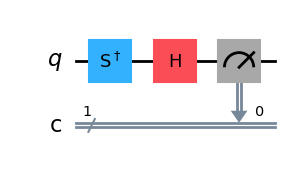

In [14]:
qc2 = qiskit.QuantumCircuit(1,1)
qc2.sdg(0)
qc2.h(0)
qc2.measure(0,0)
qc2.draw(output='mpl')

In [10]:
qiskit.visualization.plot_histogram(counts)

NameError: name 'counts' is not defined